# Chapter 7

## The task of statistical inference redeux

We are trying to use data to infer what the probability distribution is that is generating the data. 

Some paradigmatic examples:

- On the basis of a number of flips, are we dealing with a fair coin or a biased coin? More concretely: on the basis of a number of trials, are we dealing with a medical procedure where the chances of success are 50/50 or where they are 70/30?

- On the basis of a number of measurements, are we dealing with a bell-shaped distribution which has its center more near zero or farther away from zero? More concretely: on the basis of a finite number of measurements from patients undergoing a treatment, are we dealing with a measurement which is mostly centered at zero or mostly centered away from zero? 

## The setup 

We are taking measurements in the form of independent random variables $X_1, \ldots, X_n$.

We want to know what their common probability distribution is. This is recorded in the pdf, cdf, of ccdf. For simplicity, let's choose the cdf.

We agree ahead of time that the probability distribution comes from a family $\{F_{\theta}: \theta\in \Theta\}$, where $\Theta$ is the parameter space and as one varies the parameter $\theta$ one gets different options for the probability distribution.

In the actual world $\omega$, we observe data in the form $X_1(\omega), \ldots, X_n(\omega)$. This will be a length $n$ sequence of real numbers.

We develop methods for inferring from this data towards what the value of the parameter $\theta$ is which is generating our data.

Whether we are right or wrong and in what way will be quantified by what happens with this inference method across all the worlds.

### Coin flip example

We are repeatedly and independently flipping a coin $X_1, \ldots, X_n$.

We want to know the value of $p$ such that $X_1, \ldots, X_n\sim \mathrm{Bern}(p)$.

We formulate two hypotheses:

- The null hypothesis $H_0$: $\hspace{5mm}$ $p=\frac{1}{2}$

- The alternative hypothesis $H_1$: $\hspace{5mm}$ $p \neq \frac{1}{2}$. 

We choose a comparatively large value $0\leq c<n$, and we adopt the following test:

- Test: reject $H_0$ if $S_n\geq c$.

where $S_n = \sum_{i=1}^n X_i$ is the sum of the number of heads.

Our initial intutive thinking is: since $c$ is large, if in the world $\omega$ we are in we observed $S_n\geq c$ and if the null hypothesis were true then we just observed a very rare event. Rare events are well, rare, and perhaps a more reasonable supposition is that the null hypothesis is false and we are dealing with a coin more biased towards heads.

We can quantify how rare the event $S_n\geq c$ is, assuming the null hypothesis is true: it is just given by plugging $c$ into the pdf + ccdf of $\mathrm{Binom}(n,\frac{1}{2})$ (it is the sum since the pdf handles $=c$ and the ccdf handles $>c$).

This number is also the probability, assuming the null hypothesis is true, of our test going wrong in the sense of erroneously rejecting a true hypothesis. This is called the probability of *the type I error*.

Below is a simple visual representation.

In [1]:
## visualizing pdf and cdf of Binom(n,p) 
## along with a rejection region for a hypothesis test

n = 30   # set value of n, number of trials
p = .5 # set value of p, probability of trial for X
c = 18 # set value of c, the rejection region

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


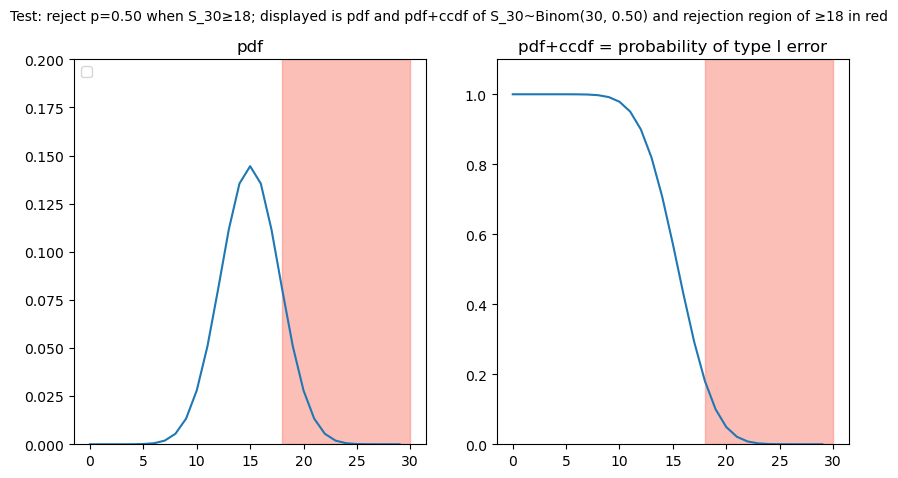

In [2]:
import numpy as np                # load numpy package
import matplotlib.pyplot as plt   # load pyplot package
from scipy.stats import binom     # load binomial distribution

v = np.arange(0, n) # values for x-axis
Xpdf = binom.pmf(v, n, p) # pdf for X
Xcdf = binom.cdf(v, n, p) # cdf for X
Xccdf = 1-Xcdf               # ccdf for X

fig, axs = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns
fig.suptitle('Test: reject p=%1.2f when S_%i≥%i; displayed is pdf and pdf+ccdf of S_%i~Binom(%i, %1.2f) and rejection region of ≥%i in red' % (p, n,c, n,n,p,c), fontsize=10)

 # Plot the PDF on the first subplot
axs[0].plot(v, Xpdf)
axs[0].set_ylim(0, .2)
axs[0].legend()
axs[0].set_title('pdf')
axs[0].axvspan(c, n, color='salmon', alpha=0.5)


# Plot the CCDF on the second subplot
axs[1].plot(v, Xpdf+Xccdf)
axs[1].set_ylim(0, 1.1)
axs[1].set_title('pdf+ccdf = probability of type I error')
axs[1].axvspan(c, n, color='salmon', alpha=0.5)

plt.show()

There are infinitely many alternatives to the null hypothesis. 

If the null hypothesis is false, one is dealing with

 $X_1, \ldots, X_n\sim \mathrm{Bern}(p)$ where $p\neq \frac{1}{2}$.

Under each of these alternatives, the null hypothesis is false. 

And under each, one can calculate the probability that of our test going wrong in the sense of erroneously failing to reject a false null hypothesis. 

This is called the probability of *the type II error*.

We still have $S_n\sim \mathrm{Binom}(n,p)$ and the probability of the type II error is $P(S_n\leq c)$, which is just given by the cdf.

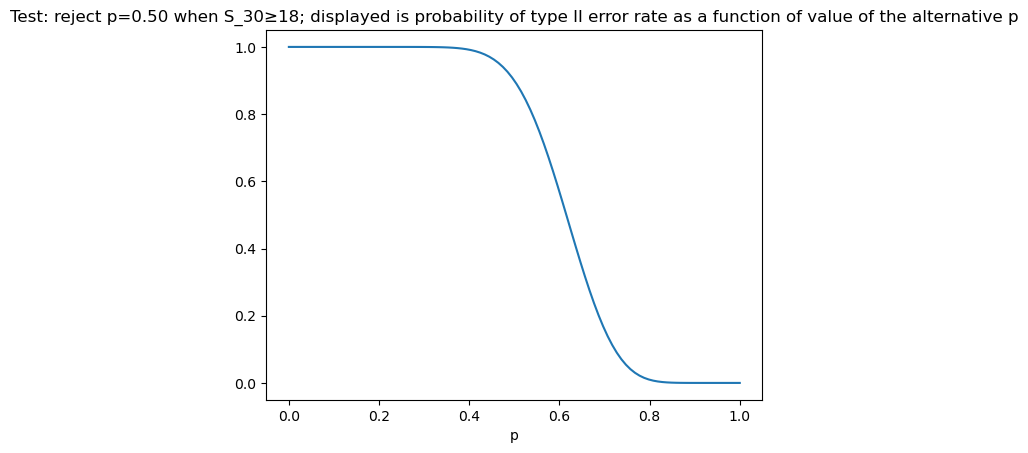

In [3]:
# Generate the p values
q = np.linspace(0, 1, 100)

# Calculate the binomial cdf
y = binom.cdf(c, n, q)

# Create the plot
plt.plot(q, y)

# Set the labels
plt.xlabel('p')
# Set the title
plt.title('Test: reject p=%1.2f when S_%i≥%i; displayed is probability of type II error rate as a function of value of the alternative p' % (p, n,c))

# Show the plot
plt.show()

We are repeatedly and independently flipping a coin $X_1, \ldots, X_n$.

We want to know the value of $p$ such that $X_1, \ldots, X_n\sim \mathrm{Bern}(p)$.

We formulate two hypotheses:

- The null hypothesis $H_0$: $\hspace{5mm}$ $p=\frac{1}{2}$

- The alternative hypothesis $H_1$: $\hspace{5mm}$ $p \neq \frac{1}{2}$. 

We choose a comparatively large value $0\leq c<n$, and we adopt the following test:

- Test: reject $H_0$ if $S_n\geq c$.

where $S_n = \sum_{i=1}^n X_i$ is the sum of the number of heads.

Our initial intutive thinking is: since $c$ is large, if in the world $\omega$ we are in we observed $S_n\geq c$ and if the null hypothesis were true then we just observed a very rare event. Rare events are well, rare, and perhaps a more reasonable supposition is that the null hypothesis is false and we are dealing with a coin more biased towards heads.

We can quantify how rare the event $S_n\geq c$ is, assuming the null hypothesis is true: it is just given by plugging $c$ into the pdf + ccdf of $\mathrm{Binom}(n,\frac{1}{2})$ (it is the sum since the pdf handles $=c$ and the ccdf handles $>c$).

This number is also the probability, assuming the null hypothesis is true, of our test going wrong in the sense of erroneously rejecting a true hypothesis.

Below is a simple visual representation.